# 1. MNIST

### 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 Loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가

In [2]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

5.0


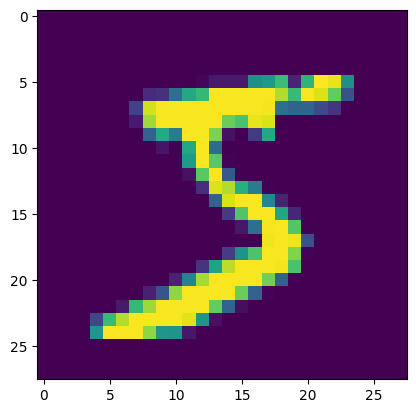

In [3]:
import matplotlib.pyplot as plt
print(data[0,0])
img = data[0, 1:].reshape(28, 28)
plt.imshow(img)

In [4]:
for row in data[1,1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

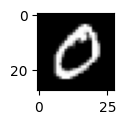

In [7]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [15]:
! pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/46.2 MB 12.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/46.2 MB 11.9 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/46.2 MB 11.8 MB/s eta 0:00:04
   -------- ------------------------------- 9.7/46.2 MB 11.6 MB/s eta 0:00:04
   ---------- ----------------------------- 12.1/46.2 MB 11.6 MB/s eta 0:00:03
   ------------ --------------------------- 14.7/46.2 MB 11.7 MB/s eta 0:00:03
   -------------- ------------------------- 17.0/46.2 MB 11.7 MB/s eta 0:00:03
   ----------------- ---------------------- 19.7/46.2 MB 11.6 MB/s eta 0:00:03
   ------------------- -------------------- 22.3/46.2 MB 11.7 MB/s eta 0:00:03
   --------------------- ------------------ 24.6/46.2 MB 11.6 MB/s eta 0:00:02
   ----------------------- ---------------- 27.3/46.2 MB 11.6 MB/s eta 0:00:02
   ------------------------- -------------- 29.9/46.2 MB 11.6 MB/

In [16]:
! pip show opencv-contrib-python

Name: opencv-contrib-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: numpy
Required-by: 


In [13]:
# 컬러사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE) # 흑백포맷으로 일기
print(image_gray.shape)
print(type(image_gray))

(646, 970)
<class 'numpy.ndarray'>


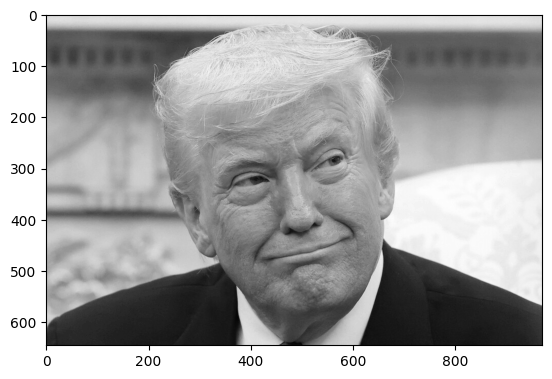

In [14]:
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 전처리

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [47]:
print(y_train[0])
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

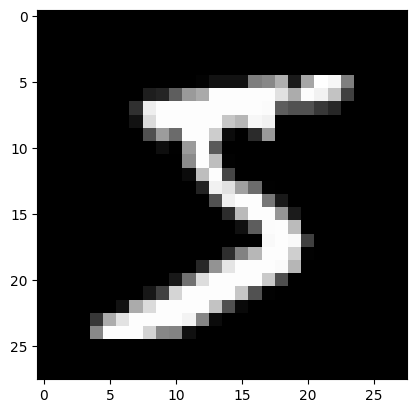

In [48]:
plt.imshow(X_train[0], cmap='gray')

In [49]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [50]:
# 학습셋(5만개:fit용), 검증셋(1만:fit용), 테스트셋(1만:평가용)

In [51]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [57]:
# 입력(독립)변수 (28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000,784).astype('float64')/255.0
val_X = X_val.reshape(10000, -1).astype('float64') / 255.0
test_X = X_test.reshape(10000, -1).astype('float64') / 255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [60]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape

IndexError: index 44004 is out of bounds for axis 0 with size 700

In [64]:
# 타겟(종속) 변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[6 3]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [65]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000,784).astype('float64')/255.0
val_X = X_val.reshape(10000, -1).astype('float64') / 255.0
test_X = X_test.reshape(10000, -1).astype('float64') / 255.0
##
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
# 타겟(종속) 변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델 구성

In [76]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                7850      
                                                                 
 dense_30 (Dense)            (None, 20)                220       
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [79]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
              optimizer = 'adam',
              metrics=['accuracy'])

# 4. 모델 학습

In [80]:
hist = model.fit(train_X, train_Y,
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 1s 53ms/step - loss: 2.2849 - accuracy: 0.1343 - val_loss: 2.2404 - val_accuracy: 0.2067
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 2.2225 - accuracy: 0.2057 - val_loss: 2.1825 - val_accuracy: 0.2200
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 2.1604 - accuracy: 0.2457 - val_loss: 2.1132 - val_accuracy: 0.2500
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 2.0865 - accuracy: 0.2629 - val_loss: 2.0318 - val_accuracy: 0.2967
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 2.0102 - accuracy: 0.2929 - val_loss: 1.9586 - val_accuracy: 0.3133
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 1.9331 - accuracy: 0.3371 - val_loss: 1.8892 - val_accuracy: 0.3367
Epoch 7/500
7/7 [==============================] - 0s 9ms/step - loss: 1.8515 - accuracy: 0.3529 - val_loss: 1.8128 - val_accuracy: 0.3700
Epoch 8/500
7/7 [========

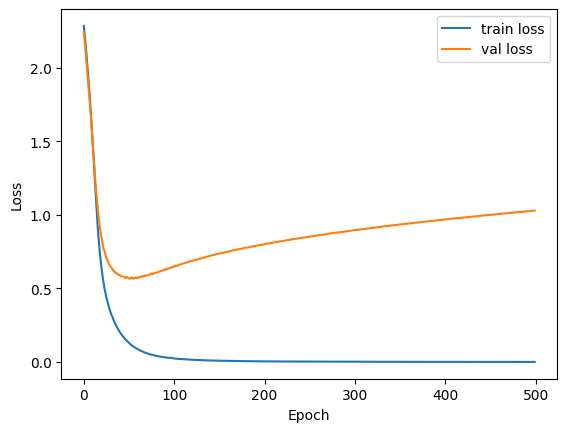

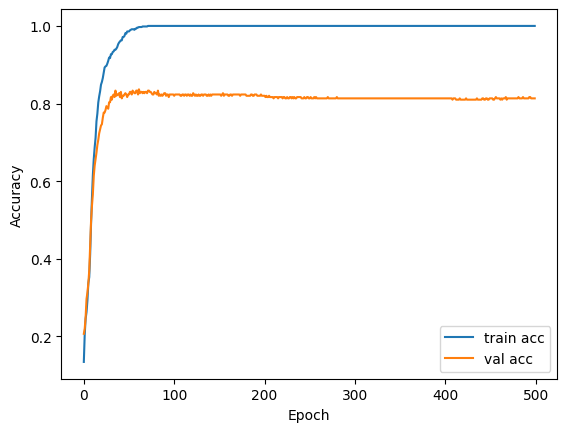

In [83]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [86]:
test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=0)
print('테스트셋 정확도:', test_acc)


테스트셋 정확도: 0.8513000011444092


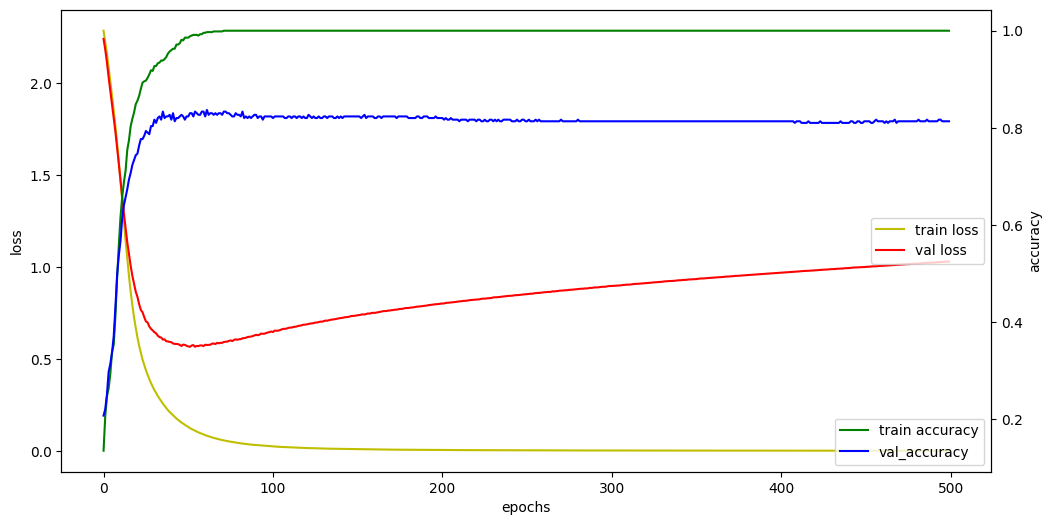

In [85]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [92]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.9256613254547119
accuracy : 0.8513000011444092


## 위 모델 (DNN) 의 accuracy 늘리기

Epoch 1/100
500/500 [==============================] - 4s 6ms/step - loss: 0.3348 - accuracy: 0.8985 - val_loss: 0.1287 - val_accuracy: 0.9620
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 0.1114 - accuracy: 0.9665 - val_loss: 0.1094 - val_accuracy: 0.9679
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.1070 - val_accuracy: 0.9718
Epoch 4/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0568 - accuracy: 0.9820 - val_loss: 0.0959 - val_accuracy: 0.9750
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.1149 - val_accuracy: 0.9750
Epoch 6/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.1179 - val_accuracy: 0.9741
Epoch 7/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.1097 - val_accuracy: 0.9764

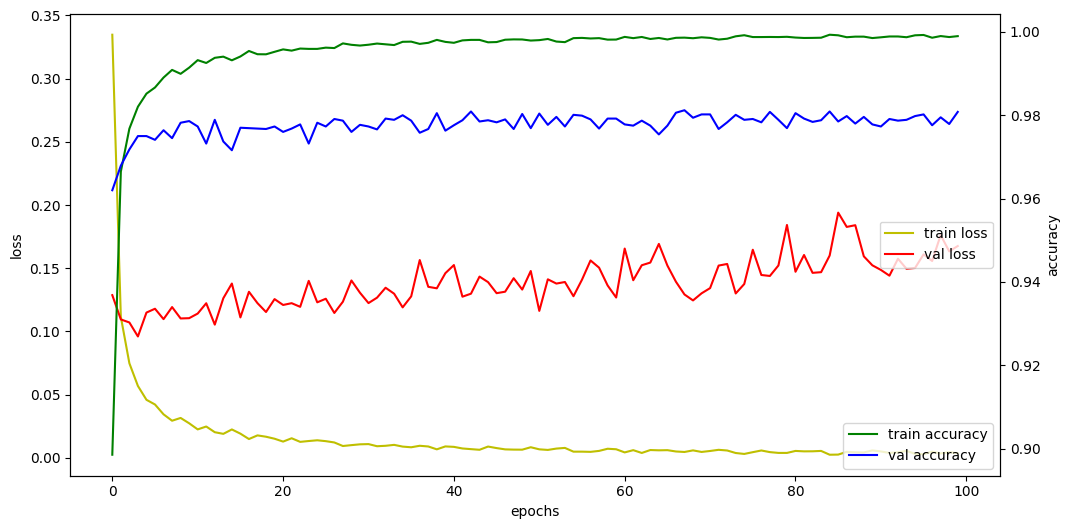

loss : 0.15324406325817108
accuracy : 0.9803000092506409
CPU times: total: 14min 16s
Wall time: 5min


In [106]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 50000)
val_idx  = np.random.choice(10000, 10000)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

# 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])

hist = model.fit(train_X, train_Y,
                epochs=100,
                batch_size=100,
                validation_data=(val_X, val_Y))
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])